Using decision trees algorithm we'll build a model that will classifie if the employee will quit the job or not



In [2]:
import pandas as pd

In [25]:
df = pd.read_csv(r"C:\Users\Ivana\Desktop\CODELearning\ML_Learning\logistic_regression\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [27]:
df = df[['satisfaction_level', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'salary','left']]
df.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,left
0,0.38,157,0,0,low,1
1,0.80,262,0,0,medium,1
2,0.11,272,0,0,medium,1
3,0.72,223,0,0,low,1
4,0.37,159,0,0,low,1


In [17]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [28]:
df['salary_num'] = df.salary.map({'low':0, 'medium':1, 'high':2})

In [29]:
df = df.drop('salary', axis="columns")

In [30]:
df.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,left,salary_num
0,0.38,157,0,0,1,0
1,0.80,262,0,0,1,1
2,0.11,272,0,0,1,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [31]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop('left', axis="columns")

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    df.left,
    test_size=0.2,
)

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [47]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

Checking the accuracy of the model

In [69]:
model.score(X_test, y_test)

0.9206666666666666

In [68]:
df.left[89]

1

In [67]:
model.predict([X.loc[89]])

c:\Users\Ivana\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
y_predicted = model.predict(X_test)

In [66]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2294
           1       0.83      0.83      0.83       706

    accuracy                           0.92      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.92      0.92      0.92      3000



In [72]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt

con_matrix = confusion_matrix(y_test, y_predicted)
con_matrix

array([[2178,  116],
       [ 122,  584]], dtype=int64)

Text(69.0, 0.5, 'Truth')

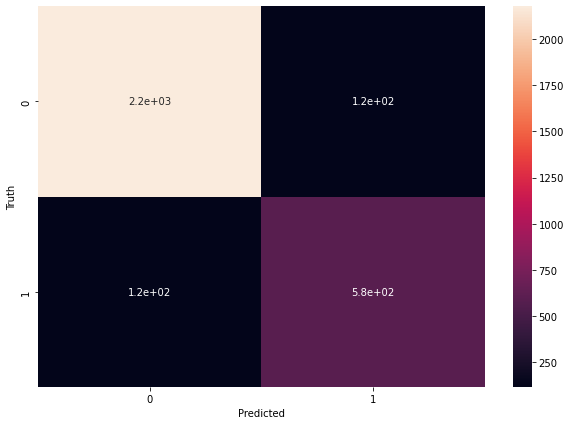

In [73]:
plt.figure(figsize = (10,7))
sn.heatmap(con_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

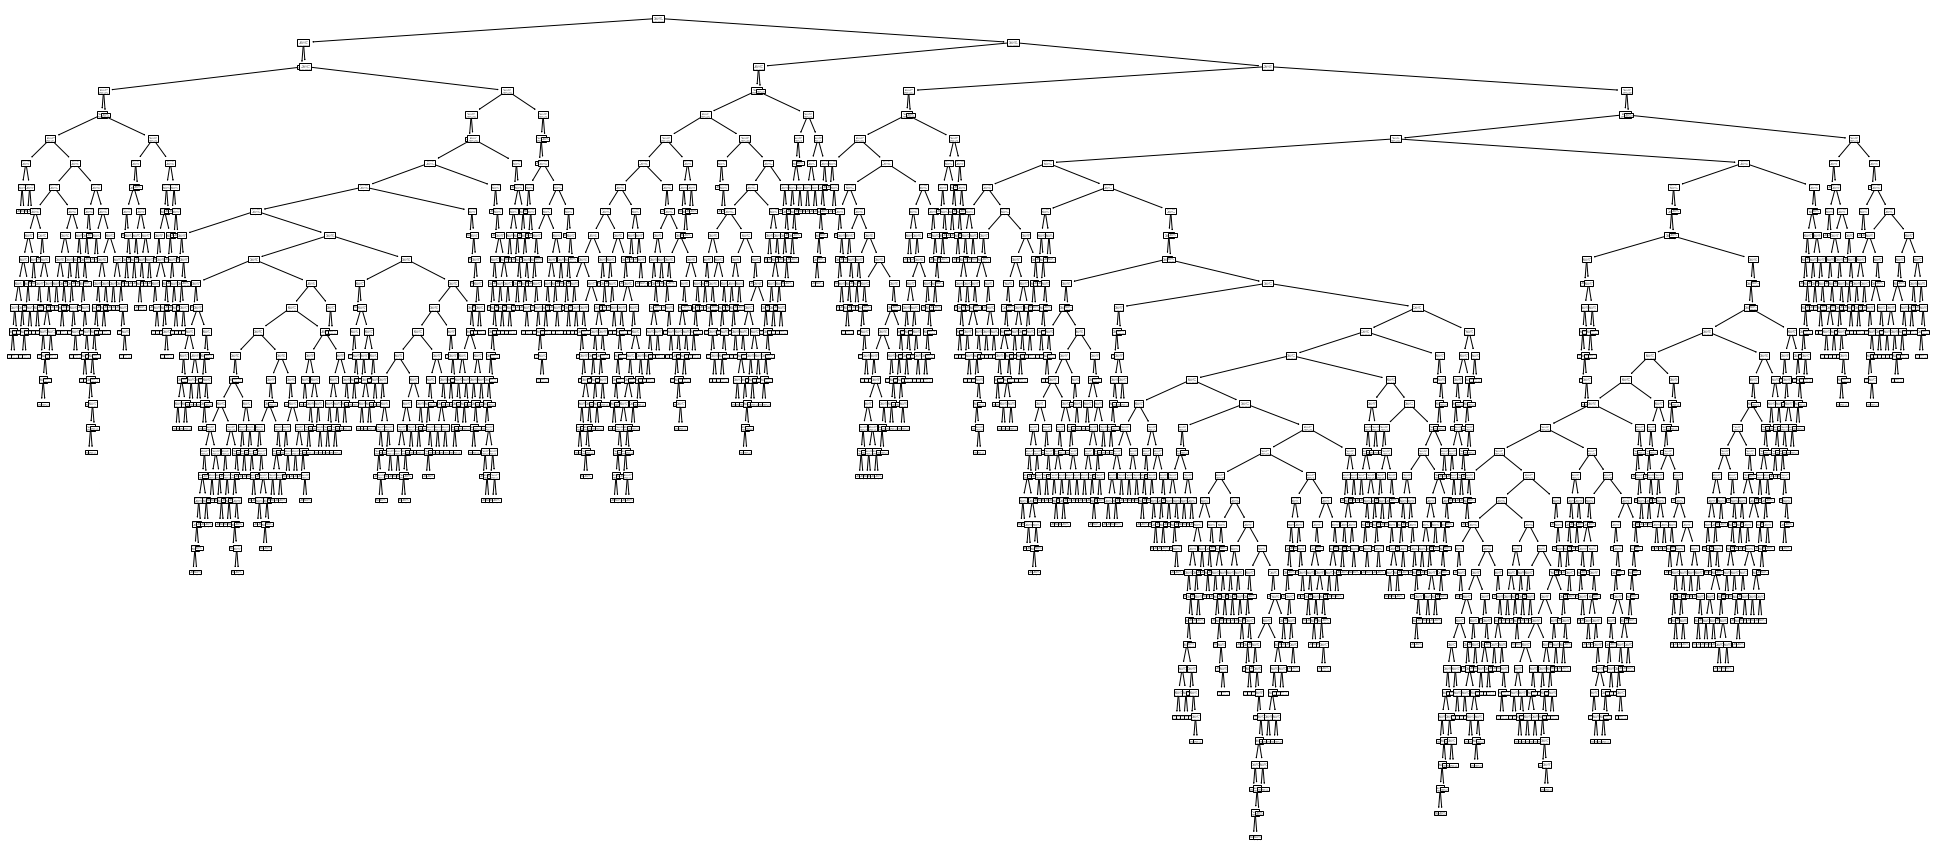

In [77]:
from sklearn import tree

## Visualizing the tree
plt.figure(figsize=(27,12))
tree.plot_tree(model, 
            #    feature_names = X_train.columns,  
            # class_names = ['stayed', 'left'],filled=True
            )
plt.tight_layout()
plt.show()
